In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\NAUFAL
[nltk_data]     HAFIZH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
data=pd.read_csv('data/csv/cleaned/ta-citilink-clean.csv')
data.head

<bound method NDFrame.head of                                                   text  label
0    Sangat kecewa utk kemunduran jam kbrgktan mask...      0
1    Cancelled flight, input data whatsapp salah, i...      0
2    Tolong di training lagi itu pramugarinya atas ...      0
3    Seumur hidup cmn pernah beli tiket citilink 2x...      0
4    Jelek banget pelayanannya, sangat sangat kecew...      0
..                                                 ...    ...
487  Luar biasa on time saat keberangkatan dan kepu...      1
488  Citilink, favorit maskapai budget dalam negri ...      1
489  Luar biasa on time saat keberangkatan dan kepu...      1
490  Citilink, favorit maskapai budget dalam negri ...      1
491  Luar biasa on time saat keberangkatan dan kepu...      1

[492 rows x 2 columns]>

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    492 non-null    object
 1   label   492 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [23]:
print('Total Data : ',data.shape[0],' Data\n')
print('Terdiri Dari (Label) : ')
print('[0] Sentimen Negatif\t\t\t:',data[data.label==0].shape[0],' data')
print('[1] Sentimen Positif\t\t\t:',data[data.label==1].shape[0],' data')

Total Data :  492  Data

Terdiri Dari (Label) : 
[0] Sentimen Negatif			: 35  data
[1] Sentimen Positif			: 457  data


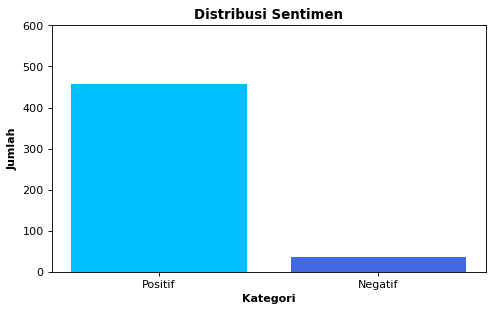

In [24]:
height=data['label'].value_counts()
labels=('Positif','Negatif')
y_pos=np.arange(len(labels))

plt.figure(figsize=(7,4),dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Sentimen',fontweight='bold')
plt.xlabel('Kategori',fontweight='bold')
plt.ylabel('Jumlah',fontweight='bold')
plt.bar(y_pos,height,color=['deepskyblue','royalblue','skyblue'])
plt.xticks(y_pos,labels)
plt.show()

## TEXT PREPROCESSING

### CASE FOLDING

In [25]:
import re

#Create function for case folding sequence
def casefolding(text):
  text=text.lower()
  text=re.sub(r'https?://\S+|www\.\S+','',text)
  text=re.sub(r'[-+]?[0-9]+','',text)
  text=re.sub(r'[^\w\s]','',text)
  text=text.strip()
  return text

In [26]:
raw_sample=data['text'].iloc[22]
case_folding=casefolding(raw_sample)

print('Raw Data\t: ',raw_sample)
print('Case Folding\t: ',case_folding)

Raw Data	:  Kursinya sempit, Sandaran kirsi tegak 90°. Perjalanan 2 jam Medan Jakarta serasa 10 jam, badan pegel ga bisa senderan sedikitpun. Apalagi untuk tidur... Akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat.  Not Recomended. *Kecewa*
Case Folding	:  kursinya sempit sandaran kirsi tegak  perjalanan  jam medan jakarta serasa  jam badan pegel ga bisa senderan sedikitpun apalagi untuk tidur akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat  not recomended kecewa


### WORD NORMALIZATION

In [27]:
key_norm=pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')

def text_normalize(text):
  text=' '.join([key_norm[key_norm['singkat']==word]['hasil'].values[0]if(key_norm['singkat']==word).any()else word for word in text.split()])
  text=str.lower(text)
  return text

### FILTERING (STOPWORD REMOVAL)

In [28]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind=stopwords.words('indonesian')

In [29]:
len(stopwords_ind)

758

In [30]:
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [31]:
more_stopword=['jt','kg','d'] # Adding more word in stopword list
stopwords_ind=stopwords_ind+more_stopword

def remove_stop_words(text):
  clean_words=[]
  text=text.split()
  for word in text:
    if word not in stopwords_ind:
      clean_words.append(word)
  return " ".join(clean_words)

In [32]:
raw_sample=data['text'].iloc[22]
case_folding=casefolding(raw_sample)
stopword_removal=remove_stop_words(case_folding)

print('Raw Data\t: ',raw_sample)
print('Case Folding\t: ',case_folding)
print('Stopword Removal\t: ',stopword_removal)

Raw Data	:  Kursinya sempit, Sandaran kirsi tegak 90°. Perjalanan 2 jam Medan Jakarta serasa 10 jam, badan pegel ga bisa senderan sedikitpun. Apalagi untuk tidur... Akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat.  Not Recomended. *Kecewa*
Case Folding	:  kursinya sempit sandaran kirsi tegak  perjalanan  jam medan jakarta serasa  jam badan pegel ga bisa senderan sedikitpun apalagi untuk tidur akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat  not recomended kecewa
Stopword Removal	:  kursinya sempit sandaran kirsi tegak perjalanan jam medan jakarta serasa jam badan pegel ga senderan sedikitpun tidur tidur rebahan kepala kedepan keatas meja lipat not recomended kecewa


### STEMMING

In [33]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory=StemmerFactory()
stemmer=factory.create_stemmer()

#Creating function for Indonesian stemming sequence
def stemming(text):
  text=stemmer.stem(text)
  return text

In [34]:
raw_sample = data['text'].iloc[22]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Kursinya sempit, Sandaran kirsi tegak 90°. Perjalanan 2 jam Medan Jakarta serasa 10 jam, badan pegel ga bisa senderan sedikitpun. Apalagi untuk tidur... Akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat.  Not Recomended. *Kecewa*
Case folding		:  kursinya sempit sandaran kirsi tegak  perjalanan  jam medan jakarta serasa  jam badan pegel ga bisa senderan sedikitpun apalagi untuk tidur akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat  not recomended kecewa
Stopword removal	:  kursinya sempit sandaran kirsi tegak perjalanan jam medan jakarta serasa jam badan pegel ga senderan sedikitpun tidur tidur rebahan kepala kedepan keatas meja lipat not recomended kecewa
Stemming		:  kursi sempit sandar kirsi tegak jalan jam medan jakarta serasa jam badan gel ga sender sedikit tidur tidur rebah kepala depan atas meja lipat not recomended kecewa


### TEXT PREPROCESSING PIPELINE

In [35]:
def text_preprocessing_process(text):
  text=casefolding(text)
  text=text_normalize(text)
  text=remove_stop_words(text)
  text=stemming(text)
  return text

In [36]:
%%time
data['clean_teks']=data['text'].apply(text_preprocessing_process)

CPU times: total: 3min 5s
Wall time: 3min 16s


In [37]:
data

,text,label,clean_teks
0,Sangat kecewa utk kemunduran jam kbrgktan mask...,0,kecewa mundur jam kbrgktan maskapai buruk pesa...
1,"Cancelled flight, input data whatsapp salah, i...",0,cancelled flight input data whatsapp salah inp...
2,Tolong di training lagi itu pramugarinya atas ...,0,tolong training pramugari nama vivi lumban sok...
3,Seumur hidup cmn pernah beli tiket citilink 2x...,0,umur hidup cmn beli tiket citilink x nya kecew...
4,"Jelek banget pelayanannya, sangat sangat kecew...",0,jelek banget layan kecewa laku kru nya kru cek...
...,...,...,...
487,Luar biasa on time saat keberangkatan dan kepu...,1,on berangkat pulang padan harga layan kelas ny...
488,"Citilink, favorit maskapai budget dalam negri ...",1,citilink favorit maskapai budget negeri harga ...
489,Luar biasa on time saat keberangkatan dan kepu...,1,on berangkat pulang padan harga layan kelas ny...
490,"Citilink, favorit maskapai budget dalam negri ...",1,citilink favorit maskapai budget negeri harga ...


In [38]:
#data.to_csv('data/csv/cleaned/ta_citilink_clean_data.csv')

In [39]:
tokenize_text=data['clean_teks'].apply(lambda x: x.split())
tokenize_text.head(5)

0    [kecewa, mundur, jam, kbrgktan, maskapai, buru...
1    [cancelled, flight, input, data, whatsapp, sal...
2    [tolong, training, pramugari, nama, vivi, lumb...
3    [umur, hidup, cmn, beli, tiket, citilink, x, n...
4    [jelek, banget, layan, kecewa, laku, kru, nya,...
Name: clean_teks, dtype: object

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token=RegexpTokenizer(r'[a-zA-Z0-9]+')
cv=CountVectorizer(ngram_range=(1,1),tokenizer=token.tokenize)
text_count=cv.fit_transform(data['clean_teks'].values.astype('U'))

In [43]:
from sklearn.model_selection import train_test_split
X=text_count
y=data['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=19)

### Support Vector Machine

In [57]:
from sklearn.svm import SVC
svcmodel=SVC(kernel='linear',random_state=10)
svcmodel.fit(X_train,y_train)
pred=svcmodel.predict(X_test)

In [58]:
accuracy_score(y_test,pred)

0.9393939393939394

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

NewprediksiBenar=(pred==y_test).sum()
NewprediksiSalah=(pred!=y_test).sum()

print('Prediksi Benar : ',NewprediksiBenar,'Data')
print('Prediksi Salah : ',NewprediksiSalah,'Data')
print('Akurasi Algoritma : ',NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,'%')

CM=confusion_matrix(y_test,pred)

TN=CM[0][0]
FN=CM[1][0]
TP=CM[1][1]
FP=CM[0][1]
precision=TP/(TP+FP)
recall=TP/(TP+FN)

print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")

print(classification_report(y_test,pred))

Prediksi Benar :  93 Data
Prediksi Salah :  6 Data
Akurasi Algoritma :  93.93939393939394 %
TRUE NEGATIVE (TN): 2
FALSE NEGATIVE (FN): 1
TRUE POSITIVE (TP): 91
FALSE POSITIVE (FP): 5
PRECISION: 94.79166666666666 %
RECALL: 98.91304347826086 %
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.95      0.99      0.97        92

    accuracy                           0.94        99
   macro avg       0.81      0.64      0.68        99
weighted avg       0.93      0.94      0.93        99



### Multinomial Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn import metrics
from math import *

mnb=MultinomialNB()
mnb.fit(X_train,y_train)
cross_mnb=cross_val_score(mnb,X,y,n_jobs=-1)
print('Cross Validation Score = ',cross_mnb)
print('Train Accuracy ={:.2f}%'.format(mnb.score(X_train,y_train)*100))
print('Test accuracy ={:.2f}%'.format(mnb.score(X_test,y_test)*100))
train_acc_mnb=mnb.score(X_train,y_train)
test_acc_mnb=mnb.score(X_test,y_test)

Cross Validation Score =  [0.93939394 0.95959596 0.98979592 0.93877551 0.91836735]
Train Accuracy =98.98%
Test accuracy =95.96%


In [50]:
model=mnb.fit(X_train,y_train)
predicted=model.predict(X_test)
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

NewprediksiBenar=(predicted==y_test).sum()
NewprediksiSalah=(predicted!=y_test).sum()

print('Prediksi Benar : ',NewprediksiBenar,'Data')
print('Prediksi Salah : ',NewprediksiSalah,'Data')
print('Akurasi Algoritma : ',NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,'%')

CM=confusion_matrix(y_test,predicted)

TN=CM[0][0]
FN=CM[1][0]
TP=CM[1][1]
FP=CM[0][1]
precision=TP/(TP+FP)
recall=TP/(TP+FN)

print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")

print(classification_report(y_test,predicted))

Prediksi Benar :  95 Data
Prediksi Salah :  4 Data
Akurasi Algoritma :  95.95959595959596 %
TRUE NEGATIVE (TN): 3
FALSE NEGATIVE (FN): 0
TRUE POSITIVE (TP): 92
FALSE POSITIVE (FP): 4
PRECISION: 95.83333333333334 %
RECALL: 100.0 %
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.96      1.00      0.98        92

    accuracy                           0.96        99
   macro avg       0.98      0.71      0.79        99
weighted avg       0.96      0.96      0.95        99



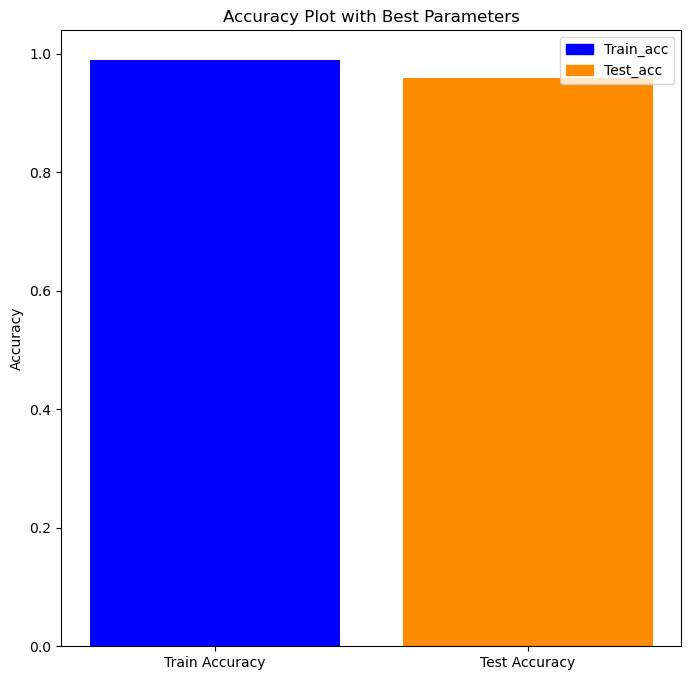

In [53]:
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

data_mnb=[train_acc_mnb,test_acc_mnb]
labels=['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_mnb)),labels)
plt.ylabel('Accuracy')
plt.title('Accuracy Plot with Best Parameters')
plt.bar(range(len(data_mnb)),data_mnb,color=['blue','darkorange'])
Train_acc=mpatches.Patch(color='blue',label='Train_acc')
Test_acc=mpatches.Patch(color='darkorange',label='Test_acc')
plt.legend(handles=[Train_acc,Test_acc],loc='best')
plt.gcf().set_size_inches(8,8)
plt.show()


In [54]:
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix

y_pred_mnb=mnb.predict(X_test)
print(confusion_matrix(y_test,y_pred_mnb))

[[ 3  4]
 [ 0 92]]


In [55]:
print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_mnb, average="macro")*100))
f1_mnb=f1_score(y_test, y_pred_mnb, average="macro")
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_mnb, average="macro")*100))
precision_mnb=precision_score(y_test, y_pred_mnb, average="macro")
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_mnb, average="macro")*100))  
recall_mnb=recall_score(y_test, y_pred_mnb, average="macro")

F1 score =78.94%
Precision score =97.92%
Recall score =71.43%


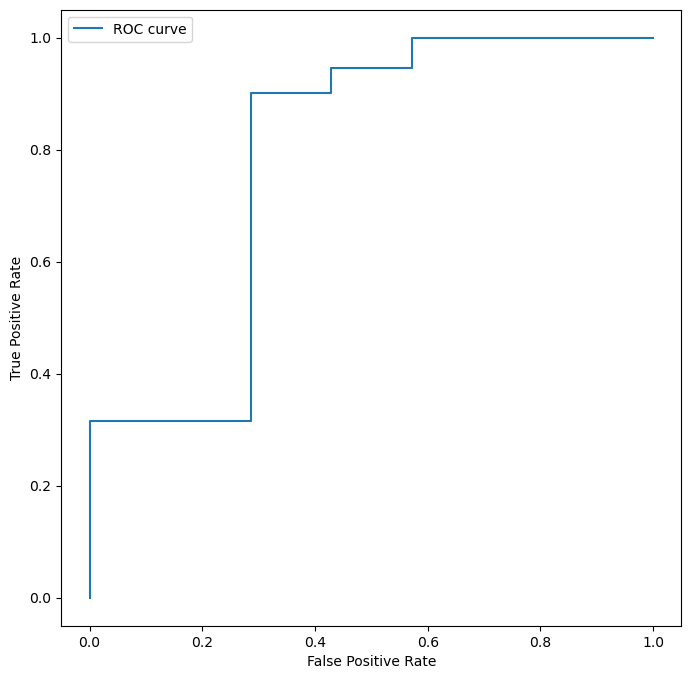

In [56]:
from sklearn.metrics import roc_curve

fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,mnb.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()